In [13]:
import pandas as pd
from sklearn import tree
import numpy as np
import pydotplus
from IPython.display import Image

In [3]:
df = pd.read_csv('GraphViz_test/german.data-numeric', header=None, index_col=None, sep='\s+')

In [11]:
coding_dict = {0: 'Status of existing checking account ',
               1: 'Duration in month ',
               2: 'Credit history ',
               3: 'Purpose',
               4: 'Credit amount ',
               5: 'Savings account/bonds',
               6: 'Present employment since',
               7: 'Installment rate in percentage of disposable income',
               8: 'Personal status and sex',
               9: 'Other debtors/guarantors',
               10: 'Present residence since',
               11: 'Property',
               12: 'Age in years',
               13: 'Other installment plans',
               14: 'Housing',
               15: 'Number of existing credits at this bank',
               16: 'Job',
               17: 'Number of people being liable to provide maintenance for',
               18: 'Telephone',
               19: 'Foreign worker'
              }
for i in range(20, 25):
    coding_dict[i] = 'to be clarified'
    
names = []
for i in range(25):
    names.append(coding_dict[i])

In [5]:
X, y = df[df.columns.drop([24])], df[24]
clf = tree.DecisionTreeClassifier(max_depth=50)
clf.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=50,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [6]:
sorted_indices = np.argsort(clf.feature_importances_)

In [12]:
# 5 топовых фич по значимости и их веса
[(coding_dict[item], clf.feature_importances_[item])  for item in list(sorted_indices)[::-1][:5]]

[('Purpose', 0.15047849341220926),
 ('Status of existing checking account ', 0.13965537397970407),
 ('Duration in month ', 0.11095257352807289),
 ('Other debtors/guarantors', 0.10779624995223804),
 ('Personal status and sex', 0.07135585710585711)]

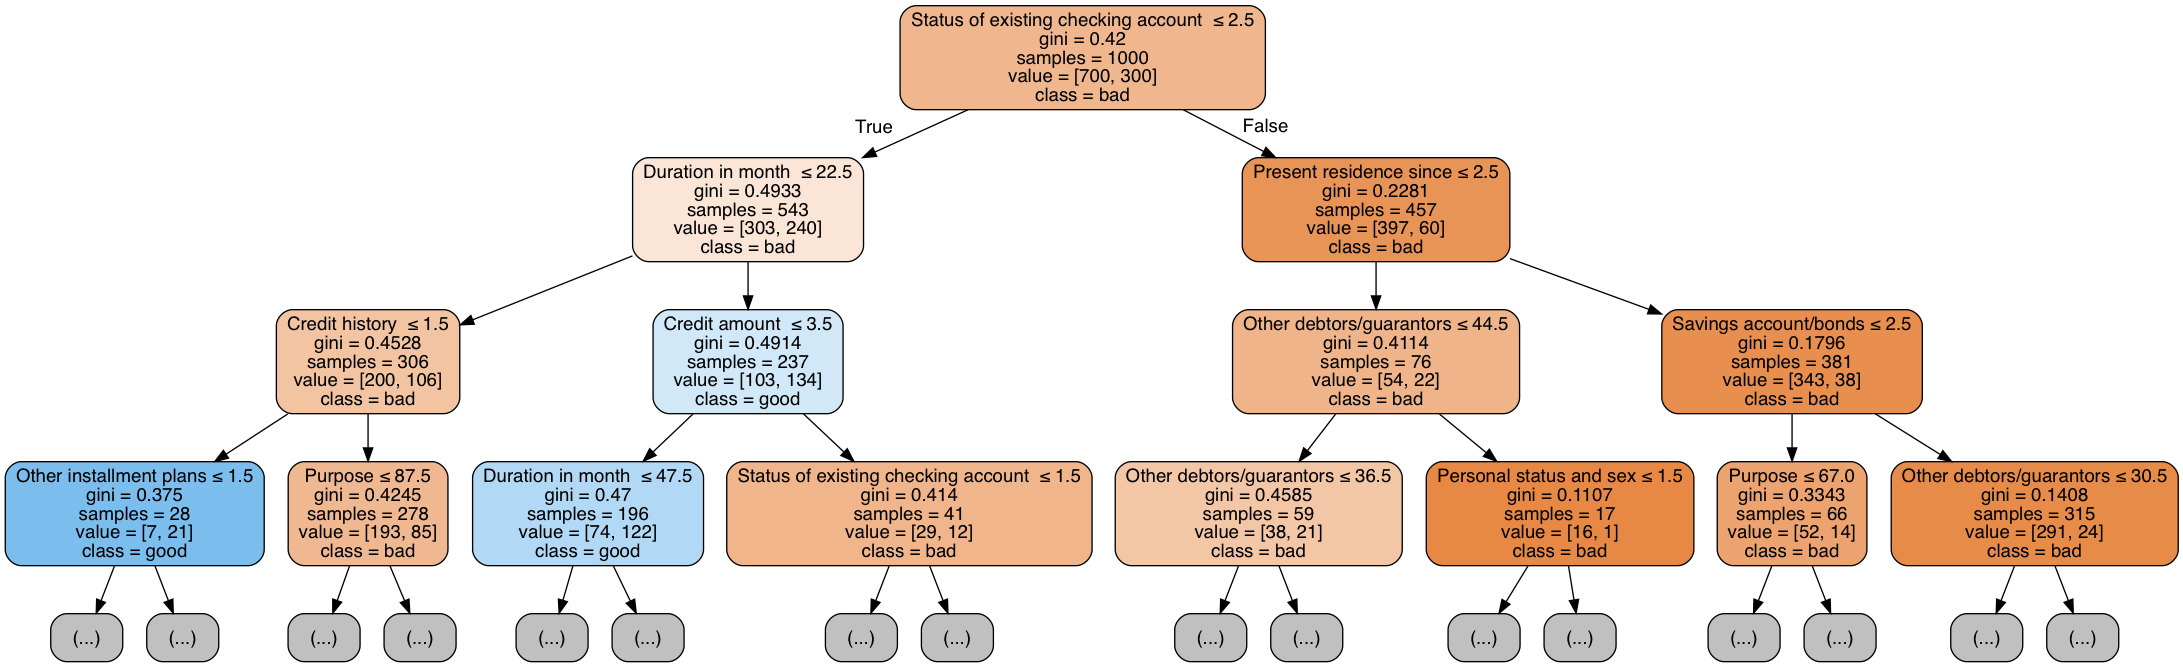

In [15]:
dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=names,  
                         class_names=['bad', 'good'],  
                         filled=True, rounded=True,  
                         special_characters=True,
                         max_depth=3)  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())  

In [18]:
df2 = pd.read_csv('GraphViz_test/german.data', header=None, index_col=None, sep='\s+')

In [ ]:
X, y = df2[df.columns.drop([20])], df[20]
clf = tree.DecisionTreeClassifier(max_depth=50)
clf.fit(X, y)

In [21]:
df2[df2[4] == 11054].T

,450
0,A14
1,36
2,A34
3,A41
4,11054
5,A65
6,A73
7,4
8,A93
9,A101
